# PCA

In this notebook I will implement a PCA (Principal component analysis),
PCA is a method to compress data, by reducing the number of columns but still keeping the maximum of information

It seems that there is different approach for implementing a PCA but here are the steps I followed:

- standardize data
- construct the covariance matrix
- find eigenvalues and eigenvector using **numpy.alg.eig**
- once we have the eigen vectors and eigen value compute, 
we need to compare eigen values between each other to see which one contains the highest variance (the more variance, the more info it has)
Say there is $m$ eigen values we will compute the variance in this way $\frac{\lambda_i}{\lambda_1 + ... + \lambda_m}$
- Then we build the feature vector from the selected eigen vector we want to keep (containing the most info), before make sure that the selected eigen vector are all perpendicular to each other
- Obtain the new generated data following this formula: $XV^T$ ($X$ being the scaled data, $V$ the feature vector)

In [1]:
import numpy
import random

In [2]:
random.seed(4) # setting the seed so that it can be reproduceable

**generating the data from numpy.random.rand**

In [3]:
data = numpy.random.rand(100, 3) # data is alreay standardized according to the doc

**build covariance matrix**

In [4]:
covMatrix = numpy.cov((data[:,0], data[:,1], data[:,2]))
covMatrix

array([[ 0.08197434,  0.01061024, -0.00338553],
       [ 0.01061024,  0.06787558,  0.00317565],
       [-0.00338553,  0.00317565,  0.06162227]])

In [5]:
eigvalues, eigvectors  = numpy.linalg.eig(covMatrix)

In [6]:
eigvalues.shape

(3,)

In [7]:
eigvectors.shape

(3, 3)

In [8]:
eigvectors

array([[-0.88450098, -0.30468343,  0.35330726],
       [-0.46287498,  0.66782321, -0.58288842],
       [ 0.05835035,  0.67910247,  0.73172062]])

In [9]:
# compute variance

variance = eigvalues / eigvalues.sum()
variance

array([0.41494919, 0.3133467 , 0.27170411])

*we can notice that the variance is more or less equally proportioned*

<AxesSubplot:>

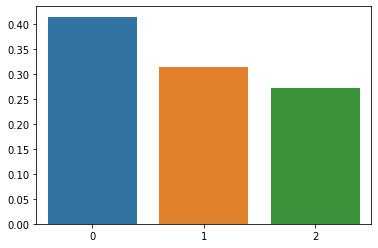

In [13]:
import seaborn

seaborn.barplot(x=[0, 1, 2], y=variance)

*Lets get the new data by just selecting only the first eigenvector (having the highest variance) as the feature vector*

In [15]:
new_data = numpy.dot(data, eigvectors[1,:].T)
new_data.shape

(100,)